# Little's Power Law Data Analysis    
In this notebook I will explore answers to questions that have bothered me in my software delivery role. Why I cannot use vanilla Little's Law to predict / forecast when piece of work will be ready, and what can I do to make it useful. 
 
### Data Background
"Sprint Team" anonymised data was kindly provided by one of my employers. Data represents 1 feature team over 1 year period.

## Initial data analysis 

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sprints = pd.read_csv("sprintTeam.csv")
sprints["CycleTime"] = sprints["CycleTime"]+1
sprints["LeadTime"] = sprints["LeadTime"]+1
display(sprints.head())

,Sprint,CycleTime,LeadTime
0,A,2,5
1,A,4,11
2,A,7,11
3,A,1,11
4,A,5,11


In [55]:
sprints.describe()

,CycleTime,LeadTime
count,516.000000,516.000000
mean,5.449612,9.447674
std,4.315178,4.520415
min,1.000000,2.000000
25%,2.000000,7.000000
50%,4.000000,9.000000
75%,8.000000,11.000000
max,35.000000,40.000000


<AxesSubplot:ylabel='Frequency'>

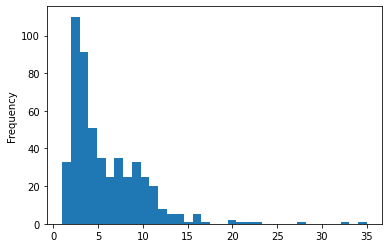

In [66]:
sprints["CycleTime"].plot(kind="hist", bins=35)

<AxesSubplot:ylabel='Frequency'>

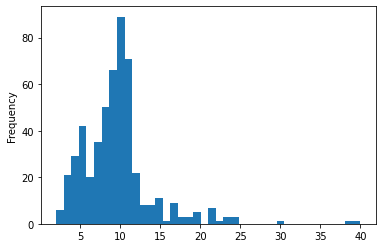

In [68]:
sprints["LeadTime"].plot(kind="hist", bins=40)

In [72]:
sprints_workitem_count = sprints.groupby('Sprint').agg(Count =('Sprint', 'count'))
sprints_workitem_count = sprints_workitem_count.reset_index()
sprints_workitem_count.describe()

,Count
count,26.000000
mean,19.846154
std,6.149421
min,5.000000
25%,16.000000
50%,19.000000
75%,24.000000
max,33.000000


<AxesSubplot:ylabel='Frequency'>

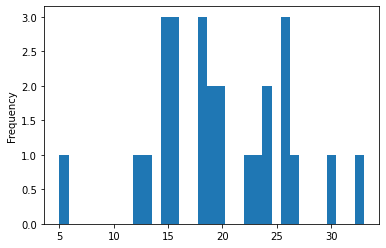

/Users/zankavtaskin/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/zankavtaskin/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [73]:
sprints_workitem_count["Count"].plot(kind="hist", bins=33)

## Looking at the log scale of distribution

In [58]:
sprints_log = sprints.copy(deep=True)
sprints_log["CycleTime"] = np.log10(sprints["CycleTime"])
sprints_log["LeadTime"] = np.log10(sprints["LeadTime"])
sprints_log.describe()

,CycleTime,LeadTime
count,516.000000,516.000000
mean,0.620401,0.929256
std,0.320001,0.205776
min,0.000000,0.301030
25%,0.301030,0.845098
50%,0.602060,0.954243
75%,0.903090,1.041393
max,1.544068,1.602060


In [59]:
display(sprints_log.head())

,Sprint,CycleTime,LeadTime
0,A,0.301030,0.698970
1,A,0.602060,1.041393
2,A,0.845098,1.041393
3,A,0.000000,1.041393
4,A,0.698970,1.041393


<AxesSubplot:ylabel='Frequency'>

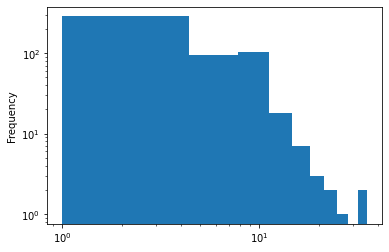

In [60]:
sprints["CycleTime"].plot(kind="hist", logy=True, logx=True)

<AxesSubplot:ylabel='Frequency'>

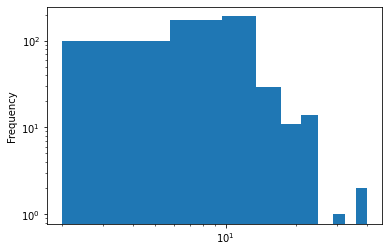

In [61]:
sprints["LeadTime"].plot(kind="hist", logx=True, logy=True)

## Finding fit

Fitting 10 distributions: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.643274,1066.674897,-3438.149881,inf,0.137322,5.988130e-09
lognorm,0.648099,1029.108214,-3428.048063,inf,0.112849,3.521478e-06
exponpow,0.666034,1059.180107,-3413.962713,inf,0.168959,2.400026e-13
chi2,0.683279,1192.999674,-3400.772249,inf,0.237677,3.944274e-26
cauchy,0.715876,1077.947455,-3382.971156,inf,0.220051,2.012268e-22


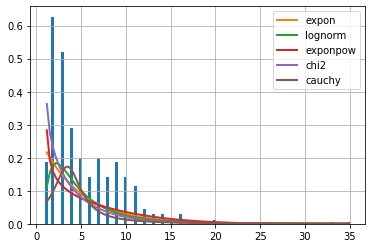

In [62]:

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(sprints["CycleTime"].values, distributions=get_common_distributions())
f.fit()
f.summary()

Fitting 10 distributions: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.445269,1025.778265,-3627.982050,inf,0.096007,1.365415e-04
rayleigh,0.463697,1397.760322,-3607.057660,inf,0.170400,1.438633e-13
norm,0.463908,1733.654458,-3606.822156,inf,0.196918,5.232667e-18
lognorm,0.464479,1156.635233,-3599.941800,inf,0.133319,1.852778e-08
gamma,0.465260,1198.585606,-3599.074936,inf,0.140849,2.152095e-09


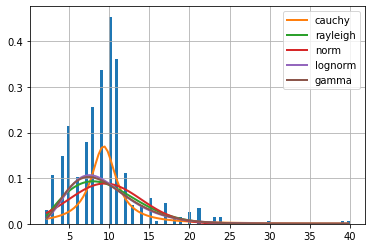

In [64]:
f = Fitter(sprints["LeadTime"].values, distributions=get_common_distributions())
f.fit()
f.summary()

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 14.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.886405,728.768307,-81.329425,inf,0.105207,0.907004
cauchy,0.895557,781.208596,-81.062376,inf,0.124219,0.772166


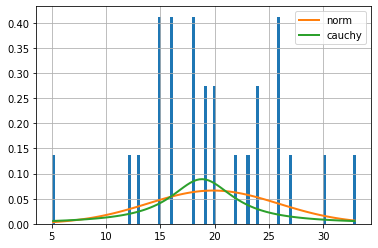

/Users/zankavtaskin/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/zankavtaskin/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [76]:
f = Fitter(sprints_workitem_count["Count"].values, distributions=["norm", "cauchy"])
f.fit()
f.summary()